In [1]:
# !pip install numpy pandas scikit-learn sentence-transformers gensim seaborn

In [2]:
# !pip install --upgrade numpy

# Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
credits_df = pd.read_csv("./input/tmdb_5000_credits.csv")
movies_df = pd.read_csv("./input/tmdb_5000_movies.csv")

credits_df.drop_duplicates(inplace=True)
movies_df.drop_duplicates(inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: './input/tmdb_5000_credits.csv'

In [4]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits_df.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
credits_df.rename(columns={"movie_id": "id"}, inplace=True)
credits_df.drop('title', axis=1, inplace=True)
X = movies_df.merge(credits_df, on='id')

In [8]:
X.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
X = X[X['status'] == 'Released']

In [11]:
X = X[['title',  'overview', 'genres', 'keywords', 'cast', 'crew']]

In [12]:
X.isnull().sum()    ## only 3 over 4500 thousands

title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
X.dropna(inplace=True)

# Data Preprocessing

In [14]:
import json

def string_to_dictionary(dictionaries_str):
    dictionaries = []

    dictionaries_str = dictionaries_str.split('}, ')
    for i in range(len(dictionaries_str) - 1):
        dictionaries_str[i] = dictionaries_str[i] + '}'


    dictionaries_str[0] = dictionaries_str[0][1:]
    dictionaries_str[-1] = dictionaries_str[-1][:-1]

    for dictionary_str in dictionaries_str:
        dictionaries.append(json.loads(dictionary_str))

    return dictionaries

In [15]:
def extract_director(row):
    row = string_to_dictionary(row)
    directors = []
    for r in row:
        if r['job'] == 'Director':
            directors.append(r['name'])
    return directors

def map_people(row):
    people = []
    cast = set([dict['name'] for dict in string_to_dictionary(row["cast"])])
    director = extract_director(row['crew'])

    [people.append(c) for c in cast]
    [people.append(d) for d in director]

    people = ', '.join(people)
    people = str.lower(people)

    return people

def map_params(row, col_name):
    params = [dict['name'] for dict in string_to_dictionary(row[col_name])]
    params = ', '.join(params)
    params = str.lower(params)

    return params

In [16]:
cols = ['cast', 'crew', 'keywords', 'genres']

for col in cols:
    X['lenght'] = X[col].str.len()
    index_to_drop = X[X['lenght'] < 5].index
    X.drop(index_to_drop, inplace = True)

X['people'] = X.apply(lambda row: map_people(row), axis=1)
X['keywords'] = X.apply(lambda row: map_params(row, 'keywords'), axis=1)
X['genres'] = X.apply(lambda row: map_params(row, 'genres'), axis=1)

X.drop(['cast', 'crew', 'lenght'], axis=1, inplace=True)

In [17]:
X.head(2)

,title,overview,genres,keywords,people
0,Avatar,"In the 22nd century, a paraplegic Marine is di...","action, adventure, fantasy, science fiction","culture clash, future, space war, space colony...","christopher nolen, kelly kilgour, nathan meist..."
1,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","adventure, fantasy, action","ocean, drug abuse, exotic island, east india t...","vanessa branch, ghassan massoud, tom hollander..."


In [18]:
X.to_csv('X.csv', index = False)
X = pd.read_csv('X.csv')

# People

In [19]:
people = X['people'].str.get_dummies(', ')

In [20]:
people.head(5)

,jorge de los reyes,"""weird al"" yankovic",'snub' pollard,'wild bill' laczko,50 cent,a. david burleigh,a. frank ruffo,a. j. benza,a. j. langer,a. jay radcliff,...,øyvind hagen-traberg,čarni đerić,đơn dương,đỗ thị hải yến,špela colja,нина јанковић,юлия снигирь,پیمان معادی,张立 | zhang li,徐帆
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
people[people['50 cent'] == 1]

,jorge de los reyes,"""weird al"" yankovic",'snub' pollard,'wild bill' laczko,50 cent,a. david burleigh,a. frank ruffo,a. j. benza,a. j. langer,a. jay radcliff,...,øyvind hagen-traberg,čarni đerić,đơn dương,đỗ thị hải yến,špela colja,нина јанковић,юлия снигирь,پیمان معادی,张立 | zhang li,徐帆
603,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1216,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1565,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2323,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
people.shape

(4373, 54188)

In [23]:
quantity_cols = people.shape[1]

In [24]:
mask = people.sum() < 4 ## For dimensionality reduce + one actor per film does not bring anything that can be refferenced to
people = people.loc[:, ~mask]

In [25]:
people.shape

(4373, 5424)

In [26]:
print('Dropper {} columns'.format(quantity_cols - people.shape[1]))

Dropper 48764 columns


In [27]:
people.to_csv('people.csv', index = False)
people = pd.read_csv('people.csv')

In [28]:
row_sum = people.sum(axis = 1)

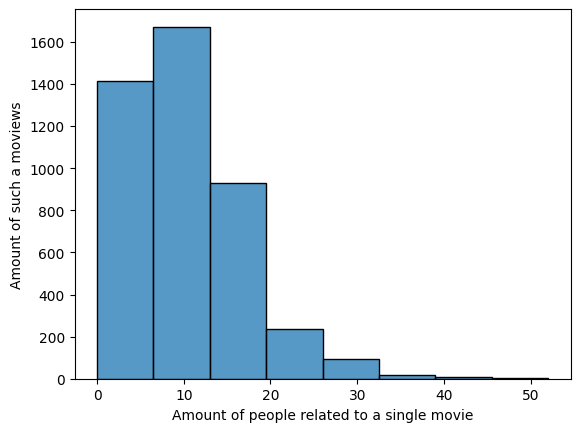

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.histplot(row_sum, bins = 8)
plt.xlabel('Amount of people related to a single movie')
plt.ylabel('Amount of such a moviews')
plt.show()

# Keywords

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

keywords_list = X['keywords'].tolist()
keywords_vectorized = vectorizer.fit_transform(keywords_list)

In [31]:
keywords = pd.DataFrame(keywords_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

In [32]:
keywords.head(5)

,11,15th,16th,17th,18th,1910s,1917,1920s,1930s,1940s,...,zombification,zone,zoo,zookeeper,zoom,zurich,γη,卧底肥妈,绝地奶霸,超级妈妈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
keywords.shape

(4373, 7151)

In [34]:
row_sum = keywords.sum(axis = 1)

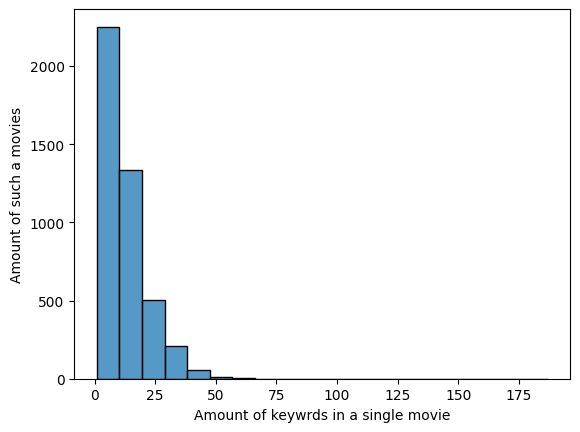

In [35]:
sns.histplot(row_sum, bins = 20)
plt.xlabel('Amount of keywrds in a single movie')
plt.ylabel('Amount of such a movies')
plt.show()

In [36]:
mask = keywords.sum() < 3
keywords = keywords.loc[:, ~mask]

In [37]:
keywords.shape

(4373, 3063)

In [38]:
keywords.to_csv('keywords.csv', index = False)
keywords = pd.read_csv('keywords.csv')

# Genres

In [9]:
genres_list = X['genres'].tolist()
genres_vectorized = vectorizer.fit_transform(genres_list)

In [10]:
genres = pd.DataFrame(genres_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

In [11]:
genres.head(5)

,10402,10749,10751,10752,10769,10770,12,14,16,18,...,movie,music,mystery,name,romance,science,thriller,tv,war,western
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,4,0,1,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,3,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,4,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,3,0,1,0,0,0,0


In [12]:
genres.shape

(4803, 44)

In [13]:
mask = genres.sum() < 2
genres = genres.loc[:, ~mask]

In [44]:
genres.shape

(4373, 22)

In [45]:
row_sum = genres.sum(axis = 1)

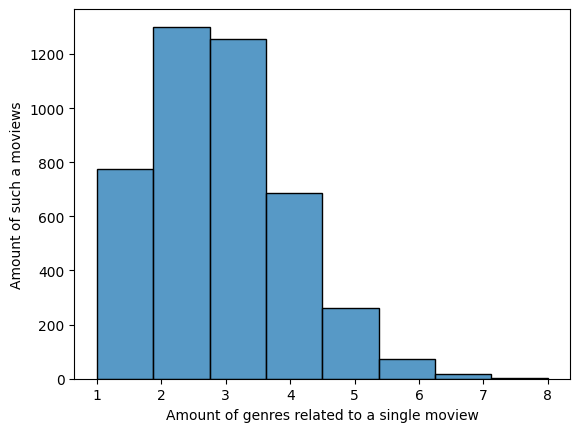

In [46]:
sns.histplot(row_sum, bins = 8)
plt.xlabel('Amount of genres related to a single moview')
plt.ylabel('Amount of such a moviews')       ## do aktorów zamiast 8 40/30
plt.show()

In [47]:
col_sum = genres.sum()

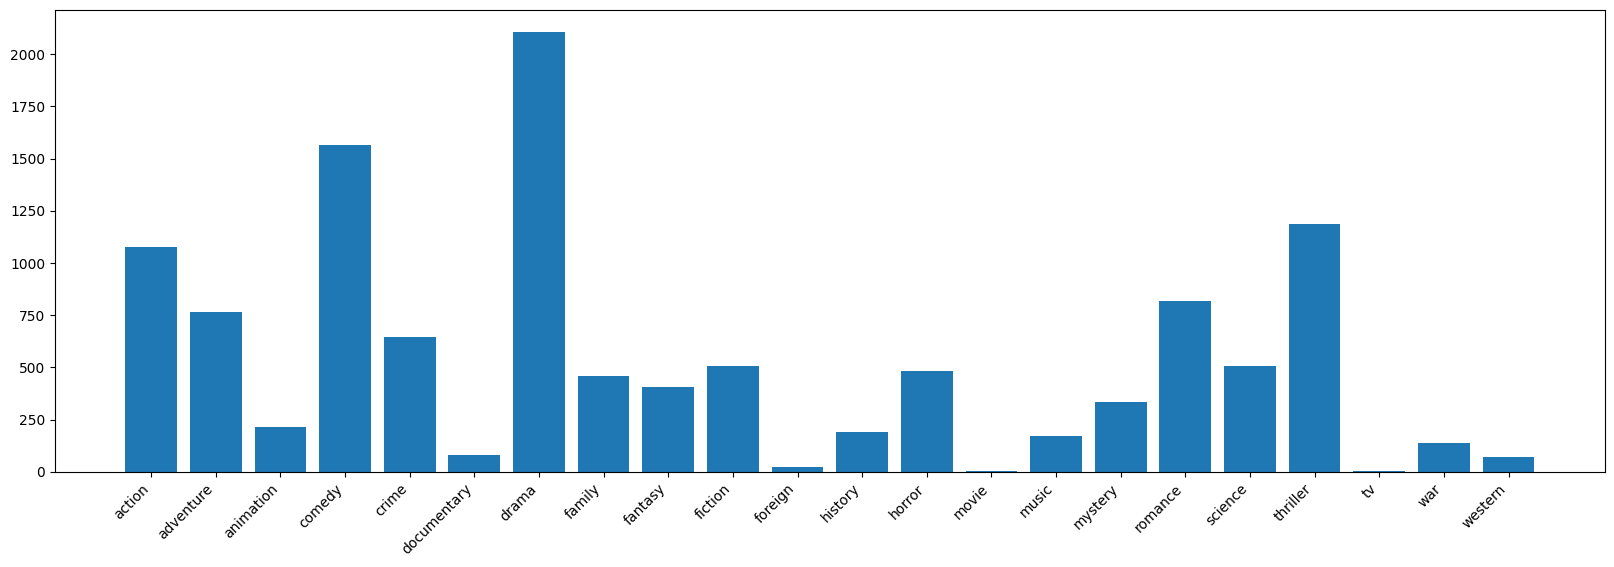

In [48]:
plt.figure(figsize=(20, 6))
plt.bar(col_sum.index, col_sum.values)
plt.xticks(rotation=45, ha='right')
plt.show()

In [49]:
genres.to_csv('genres.csv', index = False)
genres = pd.read_csv('genres.csv')

# Overview

In [50]:
from sentence_transformers import SentenceTransformer

model_name = 'bert-base-nli-mean-tokens'
model = SentenceTransformer(model_name)
oveviews = model.encode(X['overview'].values.tolist())

In [51]:
type(oveviews)

numpy.ndarray

In [52]:
oveviews.shape

(4373, 768)

In [53]:
oveviews[1]

array([-8.75676870e-02,  9.30856019e-02,  8.28875363e-01,  4.15362418e-01,
        1.17642015e-01, -6.93903387e-01,  1.08241332e+00,  7.54093826e-02,
        1.49650857e-01, -6.05520368e-01, -6.40504003e-01, -1.71053112e-01,
        5.35892427e-01,  1.07640231e+00, -1.49491116e-01,  3.18776816e-01,
       -8.16193700e-01, -1.71740667e-03, -5.60867906e-01, -9.19480845e-02,
       -2.59401053e-01,  1.69930175e-01, -1.57564104e-01, -2.42773324e-01,
        6.98375583e-01,  7.30723366e-02, -8.15731943e-01, -6.93092883e-01,
       -1.56627536e+00,  9.54615772e-01, -7.91241288e-01,  1.66265219e-01,
        5.00801742e-01, -1.78053752e-02, -4.07880664e-01,  4.00821567e-01,
       -2.19042316e-01, -2.29652584e-01,  1.74002394e-01,  5.16356349e-01,
       -3.43922317e-01,  2.66373336e-01,  1.55664355e-01,  3.23762512e-03,
       -2.57163346e-01, -3.25948834e-01,  9.55774248e-01,  2.53193319e-01,
        7.00211883e-01, -1.04408085e+00,  5.30450404e-01,  2.78827846e-01,
        8.71334136e-01,  

In [54]:
np.save('oveviews.npy', oveviews)
oveviews = np.load('oveviews.npy')

# Model

In [55]:
from sklearn.metrics.pairwise import cosine_similarity
people_similarity = cosine_similarity(people)
keywords_similarity = cosine_similarity(keywords)
genres_similarity = cosine_similarity(genres)
oveviews_similarity = cosine_similarity(oveviews)

In [56]:
similarity = (0.5 * oveviews_similarity) + (0.2 * people_similarity) + (0.2 * keywords_similarity) + (0.1 * genres_similarity)

In [57]:
titles = X['title'].unique()

In [58]:
def recommend_similar_movies(similarity, movie):
    if movie not in titles:
        print('No movie in dataframe')
    else:
        movie_index = X[X['title'] == movie].index[0]
        distances = similarity[movie_index]

        movies = sorted(list(enumerate(distances)), reverse=True, key= lambda x: x[1])[1:11]

        for movie in movies:
            print(X.iloc[movie[0]].title)

In [59]:
recommend_similar_movies(similarity, 'The Dark Knight')

Batman Begins
The Dark Knight Rises
Batman
Batman & Robin
Defendor
Batman v Superman: Dawn of Justice
Batman Forever
Need for Speed
Batman Returns
Dick Tracy


# Recommendation system

In [60]:
from enum import Enum

class Indicator(Enum):
    OVERVIEW = 'overview'
    PEOPLE = 'people'
    KEYWORDS = 'keywords'
    GENRES = 'genres'
    DEFAULT = 'default'

def advance_recommendations(movie, indicator):
    similarity = (0.5 * oveviews_similarity) + (0.2 * people_similarity) + (0.2 * keywords_similarity) + (0.1 * genres_similarity)

    switch = {
        Indicator.OVERVIEW: oveviews_similarity,
        Indicator.PEOPLE: people_similarity,
        Indicator.KEYWORDS: keywords_similarity,
        Indicator.GENRES: genres_similarity,
        Indicator.DEFAULT: similarity
    }

    similarity = switch.get(indicator, None)
    
    recommend_similar_movies(similarity, movie)


In [61]:
advance_recommendations('The Dark Knight', Indicator.OVERVIEW)

Batman Begins
Batman
The Dark Knight Rises
Batman v Superman: Dawn of Justice
Defendor
Batman Forever
Exit Wounds
Firestorm
Teenage Mutant Ninja Turtles
Dredd


In [62]:
advance_recommendations('The Dark Knight', Indicator.DEFAULT)

Batman Begins
The Dark Knight Rises
Batman
Batman & Robin
Defendor
Batman v Superman: Dawn of Justice
Batman Forever
Need for Speed
Batman Returns
Dick Tracy
